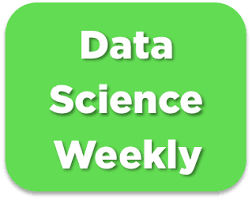

# Challenge : predict conversions 🏆🏆

This is the template that shows the different steps of the challenge. In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the preprocessing/training steps to get the model with the best f1-score ! May the force be with you 🧨🧨  

**For a detailed description of this project, please refer to *02-Conversion_rate_challenge.ipynb*.**

# Import libraries

In [1]:
! pip install plotly

  Using cached plotly-5.3.1-py2.py3-none-any.whl (23.9 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [2]:
data = pd.read_csv('https://julie-2-next-resources.s3.eu-west-3.amazonaws.com/FULL_STACK_12_WEEK_PROGRAM/M06-Supervised_Machine_Learning/D10-PROJECTS_Supervised_Machine_Learning/conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Explore dataset

In [5]:
# The dataset is quite big : you must create a sample of the dataset before making any visualizations !
data_sample = data.sample(10000, random_state=50)

In [6]:
data_sample.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,5608,NaN,NaN,4834,NaN,NaN
mean,NaN,30.521100,0.696900,NaN,4.908500,0.035100
std,NaN,8.268288,0.459621,NaN,3.375154,0.184042
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [7]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 272162 to 16169
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              10000 non-null  object
 1   age                  10000 non-null  int64 
 2   new_user             10000 non-null  int64 
 3   source               10000 non-null  object
 4   total_pages_visited  10000 non-null  int64 
 5   converted            10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


In [8]:
data_sample.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

In [9]:
data_sample["country"].value_counts()

US         5608
China      2414
UK         1575
Germany     403
Name: country, dtype: int64

In [10]:
data_sample["age"].value_counts()

27    489
28    461
30    450
29    444
31    438
32    424
26    424
25    421
33    418
24    407
23    405
22    383
21    363
36    355
35    352
34    350
20    309
37    302
19    298
38    293
17    251
39    250
18    244
40    224
41    187
42    173
43    155
44    134
46    112
45    101
47     76
48     71
49     43
50     42
51     38
52     27
55     16
54     14
53     13
56      9
57      8
59      8
58      5
65      3
62      3
60      2
64      2
61      2
66      1
Name: age, dtype: int64

In [11]:
data_sample["new_user"].value_counts()

1    6969
0    3031
Name: new_user, dtype: int64

In [12]:
data_sample["source"].value_counts()

Seo       4834
Ads       2854
Direct    2312
Name: source, dtype: int64

In [13]:
data_sample["total_pages_visited"].value_counts()

3     1406
2     1340
1     1304
4     1252
5     1141
6      984
7      757
8      568
9      378
10     245
11     178
12     103
13      97
14      67
16      37
15      36
18      27
19      24
17      22
20      10
21      10
22       7
23       4
25       2
24       1
Name: total_pages_visited, dtype: int64

In [14]:
corr = data_sample.corr()

<AxesSubplot:>

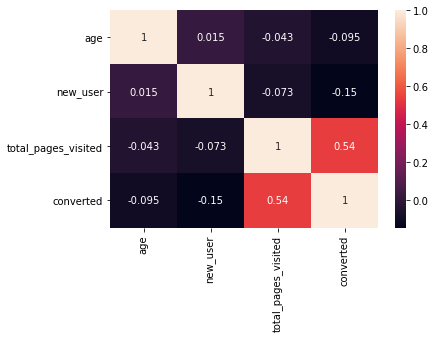

In [15]:
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='total_pages_visited', ylabel='converted'>

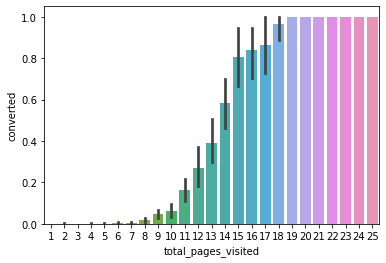

In [16]:
sns.barplot(x = data_sample["total_pages_visited"],y=data_sample["converted"])

<AxesSubplot:xlabel='total_pages_visited', ylabel='Count'>

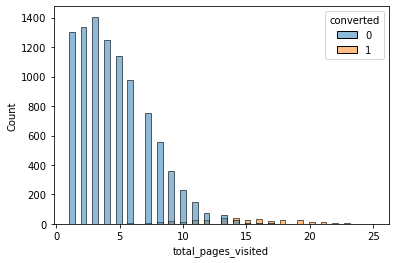

In [17]:
sns.histplot(x = data_sample["total_pages_visited"],hue=data_sample["converted"])

<AxesSubplot:xlabel='country', ylabel='converted'>

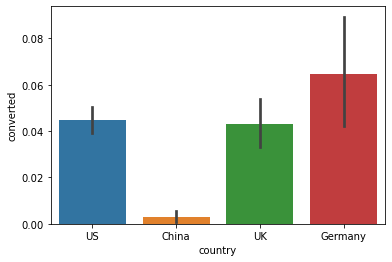

In [18]:
sns.barplot(x=data_sample["country"],y=data_sample["converted"])

<AxesSubplot:xlabel='age', ylabel='converted'>

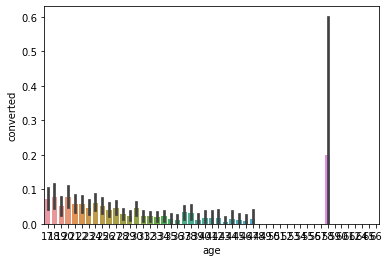

In [19]:
sns.barplot(x=data_sample["age"],y=data_sample["converted"])

<AxesSubplot:xlabel='converted', ylabel='age'>

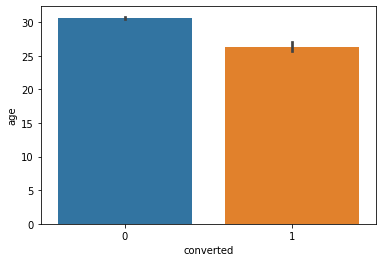

In [20]:
sns.barplot(x=data_sample["converted"], y=data_sample["age"])

<AxesSubplot:xlabel='age', ylabel='Count'>

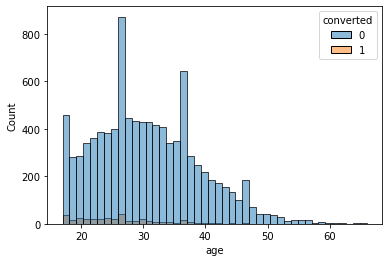

In [21]:
sns.histplot(x=data_sample["age"],hue=data_sample["converted"])

<AxesSubplot:xlabel='new_user', ylabel='converted'>

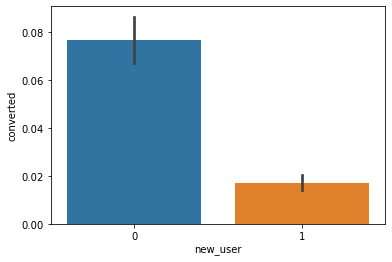

In [22]:
sns.barplot(x=data_sample["new_user"],y=data_sample["converted"])

<AxesSubplot:xlabel='new_user', ylabel='Count'>

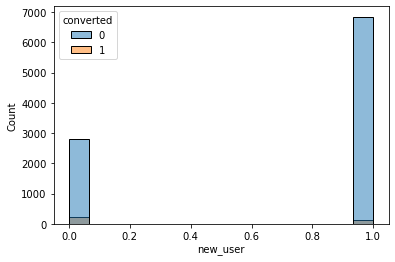

In [23]:
sns.histplot(x=data_sample["new_user"],hue=data_sample["converted"])

<AxesSubplot:xlabel='source', ylabel='Count'>

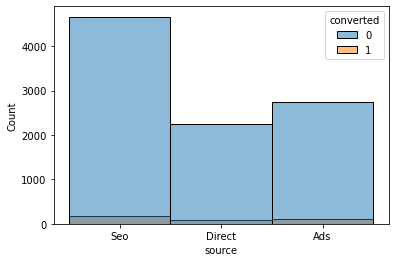

In [24]:
sns.histplot(x=data_sample["source"], hue =data_sample["converted"])

<AxesSubplot:xlabel='country', ylabel='Count'>

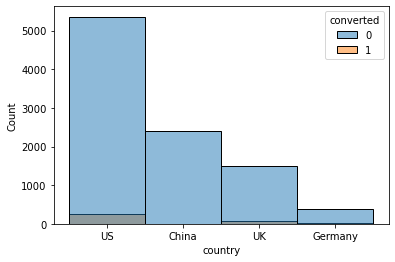

In [25]:
sns.histplot(x=data_sample["country"], hue =data_sample["converted"])

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='age'>

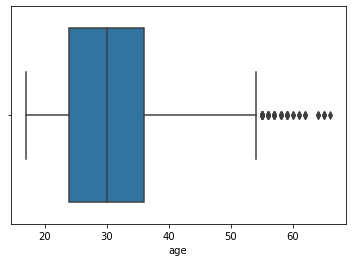

In [26]:
sns.boxplot(data_sample["age"])

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='total_pages_visited'>

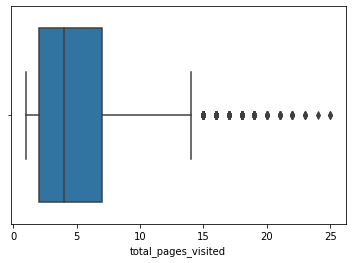

In [27]:
sns.boxplot(data_sample["total_pages_visited"])

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [5]:
features_list = ['total_pages_visited']
numeric_indices = [0]
categorical_indices = []
target_variable = 'converted'

In [6]:
X_base = data.loc[:, features_list]
Y_base = data.loc[:, target_variable]

print('Explanatory variables : ', X_base.columns)
print()

Explanatory variables :  Index(['total_pages_visited'], dtype='object')



In [7]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train_base, X_test_base, Y_train_base, Y_test_base = train_test_split(X_base, Y_base, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



## Training pipeline

In [8]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train_base = featureencoder.fit_transform(X_train_base)
print("...Done")
print(X_train_base[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.26070136]
 [ 0.93728655]
 [-0.85969532]
 [-0.56019834]
 [-0.26070136]]


In [9]:
# Train model
print("Train model...")
classifier_base = LogisticRegression() # 
classifier_base.fit(X_train_base, Y_train_base)
print("...Done.")

Train model...
...Done.


In [10]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred_base = classifier_base.predict(X_train_base)
print("...Done.")
print(Y_train_pred_base)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [11]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test_base = featureencoder.transform(X_test_base)
print("...Done")
print(X_test_base[:5])

Encoding categorical features and standardizing numerical features...
...Done
[[ 0.63778957]
 [ 0.03879562]
 [-0.26070136]
 [-0.26070136]
 [ 0.63778957]]


In [12]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred_base = classifier_base.predict(X_test_base)
print("...Done.")
print(Y_test_pred_base)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [13]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train_base, Y_train_pred_base))
print("f1-score on test set : ", f1_score(Y_test_base, Y_test_pred_base))

f1-score on train set :  0.6938517686692869
f1-score on test set :  0.7060240963855423


In [14]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train_base, Y_train_pred_base))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test_base, Y_test_pred_base))
print()

Confusion matrix on train set : 
[[246817   1082]
 [  3280   4943]]

Confusion matrix on test set : 
[[27384   117]
 [  371   586]]



**Our baseline model reaches a f1-score of almost 70%. Now, feel free to refine your model and try to beat this score ! 🚀🚀**

## regression linéaire sur tous les features 
#### f1-score on train set :  0.7640283915896611
#### f1-score on test set :  0.7595396729254997
 

In [4]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]

print(Y.head())
print(X.head())

# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

# Put here all the preprocessings
num_features = ["age", "total_pages_visited"]
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_features = ["country", "new_user", "source"]
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop="first"))
])


print("Encoding categorical features and standardizing numerical features...")

preprocessor = ColumnTransformer(transformers =[
    ("num_transformer", num_transformer, num_features),
    ("cat_transformer", cat_transformer, cat_features)
])

X_train = preprocessor.fit_transform(X_train)
X_train[:5]

# Train model
print("Train model...")
bestclassifier = LogisticRegression() # 
bestclassifier.fit(X_train, Y_train.values.ravel())
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = bestclassifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

X_test = preprocessor.transform(X_test)
print("...Done")
print(X_test)

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = bestclassifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

   converted
0          0
1          0
2          1
3          0
4          0
   country  age  new_user  source  total_pages_visited
0    China   22         1  Direct                    2
1       UK   21         1     Ads                    3
2  Germany   20         0     Seo                   14
3       US   23         1     Seo                    3
4       US   28         1  Direct                    3
Dividing into train and test sets...
...Done.

Encoding categorical features and standardizing numerical features...
Train model...
...Done.
Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Encoding categorical features and standardizing numerical features...
...Done
[[-1.27809213  0.63778957  0.         ...  1.          0.
   0.        ]
 [ 0.05264881  0.03879562  0.         ...  1.          0.
   1.        ]
 [-0.31028053 -0.26070136  0.         ...  0.          0.
   1.        ]
 ...
 [ 1.62534265  1.23678353  0.         ...  0.          1.
   0.        ]
 [-1.64102147 -0.

In [17]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[246944    955]
 [  2550   5673]]

Confusion matrix on test set : 
[[27394   107]
 [  310   647]]



# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [20]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

bestclassifier.fit(X,Y)

LogisticRegression()

In [25]:
# Read data without labels
data_without_labels = pd.read_csv('https://julie-2-next-resources.s3.eu-west-3.amazonaws.com/FULL_STACK_12_WEEK_PROGRAM/M06-Supervised_Machine_Learning/D10-PROJECTS_Supervised_Machine_Learning/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

Prediction set (without labels) : (31620, 5)


In [26]:
data_without_labels.head()

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3


In [28]:


# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ["country", "age", "new_user", "source", "total_pages_visited"]
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
#print("Convert pandas DataFrames to numpy arrays...")
#X_without_labels = X_without_labels.values
#print("...Done")
#\
#print(X_without_labels[0:5,:])
#\

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [29]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.31028053  3.33326238  0.          1.          0.          0.
   0.          1.        ]
 [-1.03613923  0.03879562  0.          1.          0.          1.
   1.          0.        ]
 [ 0.17362526 -1.15919229  0.          0.          0.          1.
   0.          1.        ]
 [ 0.17362526  0.3382926   0.          0.          1.          1.
   0.          0.        ]
 [-0.67320988 -0.56019834  0.          0.          0.          0.
   0.          1.        ]]


In [38]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': bestclassifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_FLORIANE-model1.csv', index=False)


In [39]:
Y_predictions.head()

,converted
0,1
1,0
2,0
3,0
4,0


In [40]:
Y_predictions.shape

(31620, 1)

## Analyzing the coefficients and interpreting the result
**In this template, we just trained a model with only one feature (total_pages_visited), so there's no analysis to be done about the feature importance 🤔**

**Once you've included more features in your model, please take some time to analyze the model's parameters and try to find some lever for action to improve the newsletter's conversion rate 😎😎**